# Исследование надежности заемщиков


___
**Описание проекта**  

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.
___
**Описание данных:**  

- `children` — количество детей в семье;
- `days_employed` — общий трудовой стаж в днях;
- `dob_years` — возраст клиента в годах;
- `education` — уровень образования клиента;
- `education_id` — идентификатор уровня образования;
- `family_status` — семейное положение;
- `family_status_id` — идентификатор семейного положения;
- `gender` — пол клиента;
- `income_type` — тип занятости;
- `debt` — имел ли задолженность по возврату кредитов;
- `total_income` — ежемесячный доход;
- `purpose` — цель получения кредита.
___
**Что важно учесть:**  

На что нужно обратить внимание:

- Как вы описываете найденные в данных проблемы?
- Какие методы замены типов данных, обработки пропусков и дубликатов применяете?
- Категоризируете ли данные?
- Соблюдаете ли структуру проекта и поддерживаете аккуратность кода?
- Какие выводы делаете?
- Оставляете ли комментарии к шагам?

Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sb

try:
    data = pd.read_csv('./data.csv')
except:
    print('File_not_found')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

**Первоначально проверим данные на корректность. Посмотрим на слобец `gender` и проверим нет ли в нём ошибоных данных:**

In [22]:
# Выведем перечень уникальных значений столбца 'gender'

data['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

**Посчитаем число значенией в каждой категории и найдем строки с аномальными значениями:**

In [23]:
# Посчитаем число значенией в каждой категории в столбце 'gender'

data['gender'].value_counts()

F      14092
M       7238
XNA        1
Name: gender, dtype: int64

In [24]:
# Выведем строку со значением 'XNA'

data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
10701,0,2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905,покупка недвижимости,B,операции с недвижимостью


**Строка `10701` содержит одно аномальное значение `XNA`. Вероятнее всего это вызвано технической ошибкой или 
человеческим фактором. Удалим данную строку из датафрейма `data`.**

In [25]:
data = data[data['gender'] != 'XNA']

**Ещё раз выведем перечень уникальных значений столбца `gender`, чтобы убедиться, что артефакты удалены.**

In [26]:
data['gender'].unique()

array(['F', 'M'], dtype=object)

**Исследуем слобец `dob_years` и проверим нет ли в нём ошибоных данных:**

In [27]:
# Выведем перечень уникальных значений столбца 'dob_years'

data['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75])

**Среди перечня есть значение `0`. Посчитаем количество строк с данным значением `0` в стобце `dob_years`.**

In [28]:
data.loc[data['dob_years'] == 0]['dob_years'].count()

100

**Итого `100` строк со значением `0`, что составляет `0.47%` от общего числа всех строк. Удалим все строки со значением `0` из столбца `dob_years` в датафрейме `data`.**

In [29]:
data = data[data['dob_years'] != 0]

**Ещё раз выведем перечень уникальных значений столбца `dob_years`, чтобы убедиться, что артефакты удалены.**

In [30]:
data['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51, 59, 29, 60, 55, 58, 71, 22, 73, 66,
       69, 19, 72, 70, 74, 75])

**На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `dob_years_category` с категориями:**

- 18–25 — `'от 18 до 25'`;
- 25–35 — `'от 25 до 35'`;
- 35–45 — `'от 35 до 45'`;
- 45–55 — `'от 45 до 55'`;
- 55–65 — `'от 55 до 65'`;
- 65 и выше — `'от 65 и выше'`.

In [31]:
def categorize_dob_years(dob_years):
    try:
        if 18 <= dob_years <= 25:
            return 'от 18 до 25'
        elif 25 <= dob_years <= 35:
            return 'от 25 до 35'
        elif 35 <= dob_years <= 45:
            return 'от 35 до 45'
        elif 45 <= dob_years <= 55:
            return 'от 45 до 55'
        elif 55 <= dob_years <= 65:
            return 'от 55 до 65'
        elif dob_years >= 65:
            return 'от 65 и выше'
    except:
        pass

In [32]:
data['dob_years_category'] = data['dob_years'].apply(categorize_dob_years)

**Исследуем слобец `debt` и проверим нет ли в нём ошибоных данных:**

In [33]:
data['debt'].unique()

array([0, 1])

**Для начала посчитаем в процентном соотношении долю просроченных кредитов в зависимости от количества детей:**

In [34]:
display((data.groupby('children')['debt'].sum() / data.groupby('children')['debt'].count()) * 100)

children
0    7.545824
1    9.202838
2    9.514468
3    8.231707
4    9.756098
5    0.000000
Name: debt, dtype: float64

**Как видим, в среднем количество просроченных займов составляет 8%. Лишь у категории людей с 5 детьми она составляет 0%, но это вполне закономерно, т.к. количество семей с 5 детьми и более, ничтожно мало.**  
**Первоначально можно сделать вывод, что количество детей не влияет на количество просроченных кредитов. У всех категорий в среднем она составляет 8%.**

**Отобразим долю просроченных кредитов в зависимости от количества детей с учетом гендера заёмщика, в процентах:**

In [35]:
display((data.pivot_table(index=['children'], columns='gender', values='debt', aggfunc='sum') / data.pivot_table(index=['children'], columns='gender', values='debt', aggfunc='count')) * 100)

gender,F,M
children,,
0,6.219641,10.305427
1,7.905010,11.525029
2,10.745790,7.575758
3,8.717949,7.518797
4,3.571429,23.076923
5,0.000000,0.000000


**При учёте гендера заёмщика, разница невозврата займа, между мужчинами и женщинами, иногда составляет 50%.**

**Проведем более глубокий анализ.**  
**Создадим сводную таблицу и посчитаем процент не погашенных займов от общего числа выданных займов в каждой возрастной категории, учитывая пол заемщика:**

dob_years_category  от 18 до 25  от 25 до 35  от 35 до 45  от 45 до 55  \
children gender                                                          
0        F             8.387097     9.773260     6.767731     5.408271   
         M            13.176471    11.421099    10.591900     9.990575   
1        F            10.362694     9.488372     7.239057     6.220096   
         M            11.764706    12.878788    11.596639     9.246575   
2        F            15.384615    11.926606     9.297521     5.172414   
         M             0.000000     8.750000     6.976744     7.843137   
3        F                  NaN     9.090909     8.571429     7.142857   
         M             0.000000     6.250000     8.333333    10.000000   
4        F             0.000000     6.250000     0.000000     0.000000   
         M                  NaN    20.000000    20.000000    33.333333   
5        F                  NaN     0.000000     0.000000          NaN   
         M                  NaN          NaN     0.000000          NaN   

dob_years_category  от 55 до 65  от 65 и выше  
children gender                                
0        F             4.844427      4.696673  
         M             8.135169      5.769231  
1        F             4.651163      3.571429  
         M             7.407407     20.000000  
2        F            16.666667           NaN  
         M             0.000000           NaN  
3        F             0.000000           NaN  
         M             0.000000           NaN  
4        F                  NaN           NaN  
         M                  NaN           NaN  
5        F                  NaN           NaN  
         M             0.000000           NaN

<AxesSubplot:xlabel='dob_years_category', ylabel='children-gender'>

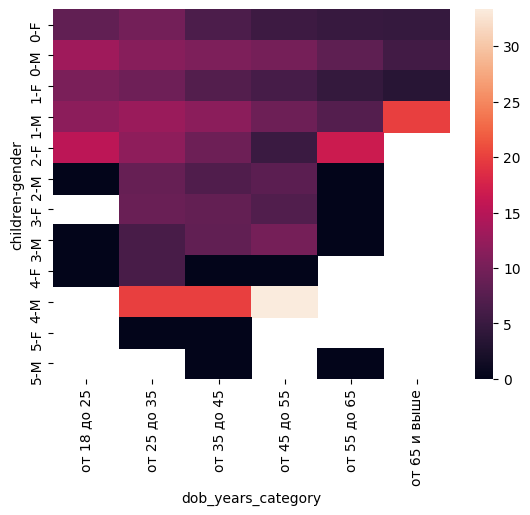

In [36]:
# Посчитаем число просроченных займов в каждой категории и сохраним в таблицу 'debt_pivot'

debt_pivot = data.pivot_table(index=['children', 'gender'], columns='dob_years_category', values='debt', aggfunc='sum')

# Посчитаем общее число выданных займов в каждой категории  и сохраним в таблицу 'count_pivot'

count_pivot = data.pivot_table(index=['children', 'gender'], columns='dob_years_category', values='debt', aggfunc='count')

# Отобразим отношение просроченных займов к общему числу выданных займов, в процентах:

display((debt_pivot / count_pivot) * 100)

# Отобразим тепловую карту, для удобства ознакомления с данными

sb.heatmap((debt_pivot / count_pivot) * 100)

**Вывод: Наблюдается прямая зависимость между количеством детей и возвратом кредита в срок.**

**Лидерами по числу задолжностей являются категории людей `от 30 до 60 лет`, `обоих полов`, у которых `нет детей`.** 

**А также категория людей `от 30 до 40 лет`, `обоих полов`, с `1 ребенком`. В редких случаях, `мужчины` в возрасте `от 25 до 60` с `4-мя детьми`, склонны с `высокой вероятностью не возвращать займы`.** 

# Вывод: 
**Есть ли зависимость между количеством детей и возвратом кредита в срок?**  

**Да, данная гипотеза частично подтверждена.**  
**В среднем процент невозврата составляет `8%`, но разница между `мужчинами` и `женщинами` может достигать `50%`. Также следует обратить внимание на `мужчин` от `25 до 65` с `4 детьми`, с процентом невозврата `до 33%`. Более полно описывают нижеприведенные данные.**  

**Вывод: Общий срез задолженностей в зависимости от количества детей показал следующие цифры, в процентах:**  
  
 - 0 — `7.54`
 - 1 — `9.23`
 - 2 — `9.45`
 - 3 — `8.18`
 - 4 — `9.75`
 - 5 — `0`  
  
**Из полученных выше данных, видим, что `в среднем количество просроченных займов составляет 8%` и разнится от количества детей `в пределах 1-2%`. Первоначально, эти цифры дают на право сделать вывод, что количество детей не влияет на количество просроченных кредитов. У всех категорий в среднем она составляет 8%.**

**При учете гендера заёмщика, получили следующие цифры, в процентах:**  

**Кол-во детей — `женщины` — `мужчины`**	
 - 0 — `6.21` — `10.30`
 - 1 — `7.90` — `11.52`
 - 2 — `10.74` — `7.57`
 - 3 — `8.71` — `7.51`
 - 4 — `3.57` — `23.07`
 - 5 — `0.00` — `0.00` 
  
**Здесь мы можем сделать следующие выводы:**
 - **У `мужчин` `без детей`, а также `мужчин` с `1 ребенком`, процент невозврата составляет `10.30%` и `11.52%` соответственно, что на `4%` выше чем у `женщин` в той же категории `без детей`.**
 - **У `женщин` с `2 детьми`, процент невозврата составляет `10.74%`, что на `3.17%` выше чем у `мужчин` в той категории с `7.51%`.**
 - **У `мужчин` и `женщин` `3 детьми`, процент невозврата сопоставим и составляет `7.51%` и `8.71%` соответственно.**
 - **У `мужчин` с `4 детьми` наблюдается всплеск процента невозврата и составляет `23.07%`. У `женщин` в данной категории с `4 детьми` процент невозврата низкий и составляет `3.57%`.**  
  
**При более детальном анализе, мы можем увидеть следующее:**  
  
 - **Высокий процент невозврата в `20%` у мужчин `от 25 до 45 лет`, с `4 детьми`.**
 - **Высокий процент невозврата в `33.3%` у мужчин `от 45 до 55 лет`, с `4 детьми`.**
 - **Высокий процент невозврата в `20%` у мужчин `от 65 лет и выше`, с `1 ребенком`.**  

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

**Исследуем слобец `family_status` и проверим нет ли в нём ошибоных данных:**

In [37]:
data['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [38]:
# Приведем данные к одному регистру, чтобы не запутаться в дальнейшем

data['family_status'] = data['family_status'].str.lower()

**Для начала посчитаем в процентном соотношении долю просроченных кредитов в зависимости от семейного положения:**

In [39]:
display((data.groupby('family_status')['debt'].sum() / data.groupby('family_status')['debt'].count()) * 100)

family_status
в разводе                7.124682
вдовец / вдова           6.553911
гражданский брак         9.314202
женат / замужем          7.557521
не женат / не замужем    9.784173
Name: debt, dtype: float64

**Отметим категории `не женат / не замужем` и `гражданский брак`, количество просроченных займов которых составляет `9%`. У остальных `категорий` количество просроченных займов в среднем составляет `7%`.**

**Отобразим долю просроченных кредитов в зависимости от семейного статуса с учетом гендера заёмщика, в процентах:**

In [40]:
display((data.pivot_table(index=['family_status'], columns='gender', values='debt', aggfunc='sum') / data.pivot_table(index=['family_status'], columns='gender', values='debt', aggfunc='count')) * 100)

gender,F,M
family_status,,
в разводе,6.616052,8.949416
вдовец / вдова,5.723906,20.000000
гражданский брак,8.203125,11.728395
женат / замужем,6.812557,8.818342
не женат / не замужем,6.880466,14.460094


**В категории `вдовец / вдова`, `мужчины` с количеством просроченных займов в `20%`, в `4` раза превышают процент невозврата по сравненю с `женщинами` с `5.72%`.**  
**Также в категории `не женат / не замужем`, `мужчины` с количеством просроченных займов в `14.4%`, в `2` раза превышают процент невозврата по сравненю с `женщинами` с `6.88%`.**  
**У остальных `категорий` количество просроченных займов между `мужчинами` и `женщинами` в среднем `одинаково`.**

**Проведем более глубокий анализ.**  
**Создадим сводную таблицу и посчитаем процент не погашенных займов от общего числа выданных займов в зависимости от семейного статуса, учитывая пол заемщика:**

family_status    в разводе  вдовец / вдова  гражданский брак  женат / замужем  \
children gender                                                                 
0        F        7.040000        5.276382          7.046799         5.962171   
         M        7.236842       21.739130         11.201867         8.705791   
1        F        5.579399        8.333333         10.298507         7.154930   
         M       10.256410       20.000000         15.360502         9.807209   
2        F        7.272727       18.750000          9.836066        10.958904   
         M       12.500000        0.000000          6.185567         7.550077   
3        F        0.000000        0.000000         19.444444         7.246377   
         M       33.333333             NaN          5.000000         6.422018   
4        F        0.000000        0.000000          0.000000         0.000000   
         M             NaN             NaN          0.000000        27.272727   
5        F             NaN             NaN          0.000000         0.000000   
         M             NaN             NaN          0.000000         0.000000   

family_status    не женат / не замужем  
children gender                         
0        F                    6.184012  
         M                   13.867822  
1        F                    8.641975  
         M                   18.699187  
2        F                   12.500000  
         M                   11.111111  
3        F                    0.000000  
         M                  100.000000  
4        F                   50.000000  
         M                         NaN  
5        F                         NaN  
         M                         NaN

<AxesSubplot:xlabel='family_status', ylabel='children-gender'>

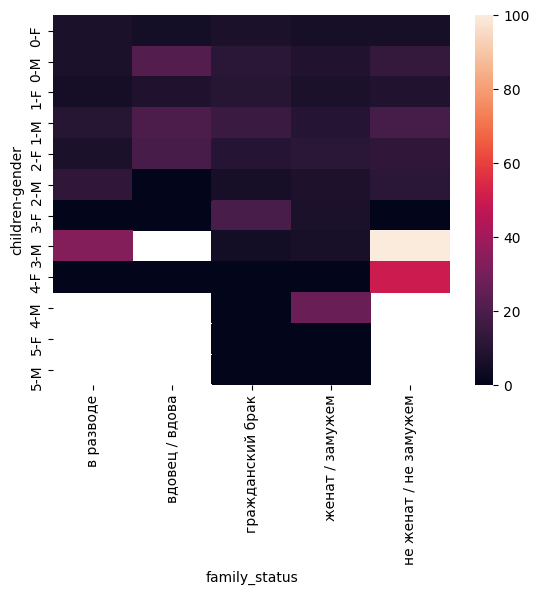

In [41]:
# Посчитаем число просроченных займов займов и сохраним в таблицу 'sum_family_pivot'

sum_family_pivot = data.pivot_table(index=['children', 'gender'], columns='family_status', values='debt', aggfunc='sum')

# Посчитаем общее число выданных займов и сохраним в таблицу 'count_family_pivot'

count_family_pivot = data.pivot_table(index=['children', 'gender'], columns='family_status', values='debt', aggfunc='count')

# Отобразим отношение просроченных займов к общему числу выданных займов, в процентах:

display((sum_family_pivot / count_family_pivot) * 100)

# Отобразим тепловую карту, для удобства ознакомления с данными

sb.heatmap((sum_family_pivot / count_family_pivot) * 100)

**Вывод: Наблюдается прямая зависимость между семейным статусом и возвратом кредита в срок.**

**`Лидерами по числу задолжнностей` являются категории людей с семейным статусом `женат / замужем`, `обоих полов`, у которых `нет детей`.**

**Прослеживается общий тренд, что у категории людей `без детей`, `обоих полов`, находятся в `числе лицеров с задолженностями`.**

**`Большое количество задолженностей` у категории людей с семейным статусом `гражданский брак, женат / замужем, не женат / не замужем`, `обоих полов`, у которых `1 или 2 ребенка`.** 

# Вывод: 
**Есть ли зависимость между семейным положением и возвратом кредита в срок?**  

**Да, данная гипотеза частично подтверждена.**  
**У людей `не состоящих в браке` и `людей в гражданском браке`, вероятность стать должником на `26%` выше, чем у остальных `категорий` семейного статуса. Об этом свидетельствуют ниже приведенные данные.**  

**Общий срез задолженностей в зависимости от семейного статуса показал следующие цифры, в процентах:** 
  
 - в разводе — `7.124682`
 - вдовец / вдова — `6.553911`
 - гражданский брак — `9.314202`
 - женат / замужем — `7.557521`
 - не женат / не замужем — `9.784173`
  
**Из полученных выше данных, видим, что в категории `не женат / не замужем` и `гражданский брак`, количество просроченных займов которых составляет `9%`. У остальных категорий количество просроченных займов в среднем составляет `7%`.**

**При учете гендера заёмщика, получили следующие цифры, в процентах:**  

**Семейный статус — `женщины` — `мужчины`**	
 
 - в разводе — `6.616052` — `8.949416`
 - вдовец / вдова — `5.723906` — `20.000000`
 - гражданский брак — `8.203125` — `11.728395`
 - женат / замужем — `6.812557` — `8.818342`
 - не женат / не замужем — `6.880466` — `14.460094`
  
**Здесь мы можем сделать следующие выводы:**  

 - **В категории в`довец / вдова`, `мужчины` с количеством просроченных займов в `20%`, в `4 раза` превышают процент невозврата по сравненю с `женщинами` с `5.72%`.**
 - **В категории `не женат / не замужем`, `мужчины` с количеством просроченных займов в `14.4%`, в `2 раза` превышают процент невозврата по сравненю с `женщинами` с `6.88%`.**
 - **В остальных `категориях` количество просроченных займов между `мужчинами` и `женщинами` в среднем `одинаково`, с небольшим перекосом в сторону мужчин**
  
**При более детальном анализе, мы можем увидеть следующее:**  

 - **Прослеживается общий тренд, что у категории людей `без детей`, `обоих полов`, находятся в `числе лицеров с задолженностями`.**

 - **`Большое количество задолженностей` у категории людей с семейным статусом `гражданский брак, женат / замужем, не женат / не замужем`, `обоих полов`, у которых `1 или 2 ребенка`.** 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

**Для начала посчитаем в процентном соотношении долю просроченных кредитов в зависимости от уровня дохода:**

In [42]:
display((data.groupby('total_income_category')['debt'].sum() / data.groupby('total_income_category')['debt'].count()) * 100)

total_income_category
A    8.000000
B    7.078404
C    8.492649
D    6.051873
E    9.090909
Name: debt, dtype: float64

**Категория `E`, с самым низким уровнем дохода, имеет наивысшее количество просроченных займов`9%`. Наименьшее количество просроченных займов составляет `6%` в категории `D` с уровнем дохода от 30 000 до 50 000.**

**Отобразим долю просроченных кредитов в зависимости от уровня дохода с учетом гендера заёмщика, в процентах:**

In [43]:
display((data.pivot_table(index=['total_income_category'], columns='gender', values='debt', aggfunc='sum') / data.pivot_table(index=['total_income_category'], columns='gender', values='debt', aggfunc='count')) * 100)

gender,F,M
total_income_category,,
A,0.000000,13.333333
B,6.042521,8.282741
C,7.312863,11.175377
D,4.901961,14.634146
E,12.500000,0.000000


**В категории `E`, у `женщин` количество просроченных займов`12.5%`, а у `мужчин` с `0%`.**  
**Обратные цифры в категории `А`, у `мужчин` количество просроченных займов`13.3%`, а у `женщин` `0%`.**  
**Также в категориях `C` и `D`, `мужчины` с количеством просроченных займов в `11,1%` и `14,6%` соответственно, практически в `2` раза превышают процент невозврата по сравненю с `женщинами` в тех же `категориях`.**  
**В целом заметен тренд, у всех `категорий` кроме `E`, количество просроченных займов у `мужчин` в среднем `выше` чем у `женщин`.**

**Проведем более глубокий анализ.**  
**Создадим сводную таблицу и посчитаем процент не погашенных займов от общего числа выданных займов в зависимости от категории дохода, учитывая пол заемщика:**

total_income_category          A           B          C          D          E
children gender                                                              
0        F              0.000000    5.485464   6.456396   3.809524  16.666667
         M             16.666667    8.475783  11.111111  12.903226   0.000000
1        F              0.000000    6.065858   8.477366   3.333333   0.000000
         M             20.000000    9.028961  12.689902  33.333333   0.000000
2        F                   NaN   10.775862  10.670732  13.333333   0.000000
         M              0.000000    6.037736   8.461538   0.000000        NaN
3        F                   NaN    5.000000   9.333333  20.000000        NaN
         M              0.000000    4.166667   9.523810        NaN        NaN
4        F                   NaN    0.000000   4.545455        NaN        NaN
         M                   NaN  100.000000  16.666667        NaN        NaN
5        F                   NaN    0.000000   0.000000   0.000000        NaN
         M                   NaN    0.000000   0.000000        NaN        NaN

<AxesSubplot:xlabel='total_income_category', ylabel='children-gender'>

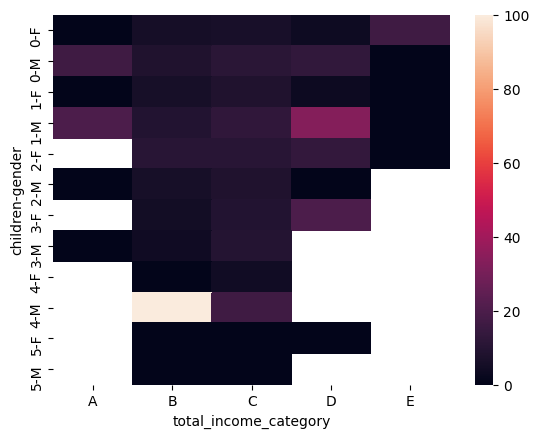

In [44]:
# Посчитаем число просроченных займов займов и сохраним в таблицу 'sum_total_income_category_pivot'

sum_total_income_category_pivot = data.pivot_table(index=['children', 'gender'], columns='total_income_category', values='debt', aggfunc='sum')

# Посчитаем общее число выданных займов и сохраним в таблицу 'count_family_pivot'

count_total_income_category_pivot = data.pivot_table(index=['children', 'gender'], columns='total_income_category', values='debt', aggfunc='count')

# Отобразим отношение просроченных займов к общему числу выданных займов, в процентах:

display((sum_total_income_category_pivot / count_total_income_category_pivot) * 100)

# Отобразим тепловую карту, для удобства ознакомления с данными

sb.heatmap((sum_total_income_category_pivot / count_total_income_category_pivot) * 100)

**Вывод: Наблюдается прямая зависимость от категории дохода и возврата кредита в срок.**  
**`Лидерами по числу задолжнностей` являются категории `С`, `обоих полов`, у которых `нет детей`. Далее категории `С` с `1 или 2 детьми`.**  
**`Большое количество задолженностей` у категории `В`, `обоих полов`, у которых `нет детей`. Далее категории `В` с `1 или 2 детьми`.**

# Вывод: 
**Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**  

**Да, данная гипотеза подтверждена.**  
**Категории людей с `низким доходом` имееют `наибольшее число задолженностей`. `Наименьшее` количество просроченных займов в категории `D` с уровнем дохода `от 30 000 до 50 000`. Об этом свидетельствуют ниже приведенные данные.**  

**Напомним таблицу с категориями дохода:**  

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

**Общий срез задолженностей в зависимости от уровня дохода показал следующие цифры, в процентах:**  
  
 - A — `8.000000`
 - B — `7.078404`
 - C — `8.492649`
 - D — `6.051873`
 - E — `9.090909`
  
**Из полученных выше данных, видим, что категория `E`, с самым `низким уровнем дохода`, имеет наивысшее количество просроченных займов `9%`. `Наименьшее` количество просроченных займов составляет `6%` в категории `D` с уровнем дохода `от 30 000 до 50 000`.**

**При учете гендера заёмщика, получили следующие цифры, в процентах:**  

**Уровень дохода — `женщины` — `мужчины`**	
 
 - A — `0.000000` — `13.333333`
 - B — `6.042521` — `8.282741`
 - C — `7.312863` — `11.175377`
 - D — `4.901961` — `14.634146`
 - E — `12.500000` — `0.000000`
  
**Здесь мы можем сделать следующие выводы:**  

 - **В категории `E`, у `женщин` количество просроченных займов`12.5%`, а у `мужчин` с `0%`.**  
 - **Обратные цифры в категории `А`, у `мужчин` количество просроченных займов`13.3%`, а у `женщин` `0%`.**  
 - **Также в категориях `C` и `D`, `мужчины` с количеством просроченных займов в `11,1%` и `14,6%` соответственно, практически в `2` раза превышают процент невозврата по сравненю с `женщинами` в тех же `категориях`.**  
 - **В целом заметен тренд, у всех `категорий` кроме `E`, количество просроченных займов у `мужчин` в среднем `выше` чем у `женщин`.**
  
**При более детальном анализе, мы можем увидеть следующее:**  

 - **`Мужчины` с доходом категории `B`, у которых `4 ребенка`, имеют `100%` просроченных займов!.**  
 - **`Мужчины` с доходом категории `D`, у которых `1 ребенок`, имеют `33%` просроченных займов.**  
 - **`Женщины` с доходом категории `D`, у которых `3 ребенка`, имеют `20%` просроченных займов.**  
 - **`Мужчины` с доходом категории `C`, у которых `4 ребенка`, имеют `16.6%` просроченных займов.**  
 - **`Мужчины` с доходом категории `A`, у которых `1 ребенок`, имеют `16.6%` просроченных займов.**  
 - **`Женщины` с доходом категории `A`, у которых `1 ребенок`, имеют `16.6%` просроченных займов.**  

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

**Для начала посчитаем в процентном соотношении долю просроченных кредитов в зависимости от цели займа:**

In [45]:
display((data.groupby('purpose_category')['debt'].sum() / data.groupby('purpose_category')['debt'].count()) * 100)

purpose_category
операции с автомобилем      9.323626
операции с недвижимостью    7.259647
получение образования       9.294710
проведение свадьбы          7.872988
Name: debt, dtype: float64

**Отметим категории `операции с автомобилем` и `получение образования`, количество просроченных займов которых составляет `9.3%`. У остальных `категорий` количество просроченных займов в среднем составляет `7.4%`.**

**Отобразим долю просроченных кредитов в зависимости от цели займи с учетом гендера заёмщика, в процентах:**

In [46]:
display((data.pivot_table(index=['purpose_category'], columns='gender', values='debt', aggfunc='sum') / data.pivot_table(index=['purpose_category'], columns='gender', values='debt', aggfunc='count')) * 100)

gender,F,M
purpose_category,,
операции с автомобилем,8.103326,11.731844
операции с недвижимостью,6.313239,9.061313
получение образования,7.820805,12.200599
проведение свадьбы,6.865285,9.933775


**В категории `операции с автомобилем`, `мужчины` с количеством просроченных займов в `11.73%`, на `3.63%` превышают процент невозврата по сравненю с `женщинами` с `8.10%`.**  
**В категории `получение образования`, `мужчины` с количеством просроченных займов в `12.2%`, на `4.38%` превышают процент невозврата по сравненю с `женщинами` с `7.82%`.**  
**В категориях `операции с недвижимостью` и `проведение свадьбы`, `мужчины` с количеством просроченных займов в `9.06%` и `9.93%`, на `2.75%` и `3.07%` превышают процент невозврата по сравненю с `женщинами` с `6.31%` и `6.86%`.**  
**Во всех `категориях` количество просроченных займов между `мужчин` в среднем `выше` чем у `женщин`.**

**Проведем более глубокий анализ.**  
**Создадим сводную таблицу и посчитаем процент не погашенных займов от общего числа выданных займов в зависимости от цели займа, учитывая пол заемщика:**

purpose_category  операции с автомобилем  операции с недвижимостью  \
children gender                                                      
0        F                      7.128099                  5.590986   
         M                     11.607143                  9.020949   
1        F                      9.271523                  7.010835   
         M                     12.784091                 10.194731   
2        F                     13.389121                  9.904153   
         M                     10.062893                  6.516291   
3        F                      7.894737                  6.930693   
         M                      9.090909                  9.090909   
4        F                      0.000000                  7.692308   
         M                     50.000000                 25.000000   
5        F                      0.000000                  0.000000   
         M                      0.000000                  0.000000   

purpose_category  получение образования  проведение свадьбы  
children gender                                              
0        F                     6.801574            6.374881  
         M                    12.735849            9.829060  
1        F                     9.059233            7.645260  
         M                    13.058419           12.871287  
2        F                    12.658228            6.896552  
         M                     9.756098            2.857143  
3        F                     7.894737           22.222222  
         M                     3.225806            7.142857  
4        F                     0.000000            0.000000  
         M                     0.000000            0.000000  
5        F                     0.000000            0.000000  
         M                          NaN                 NaN

<AxesSubplot:xlabel='purpose_category', ylabel='children-gender'>

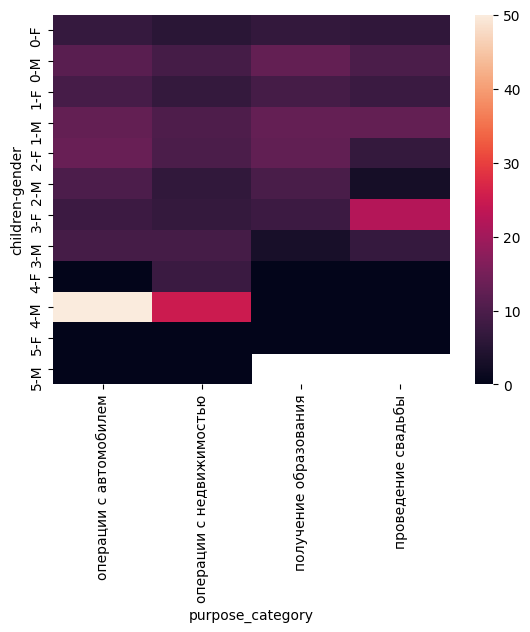

In [47]:
# Посчитаем число просроченных займов займов и сохраним в таблицу 'sum_purpose_category_pivot'

sum_purpose_category_pivot = data.pivot_table(index=['children', 'gender'], columns='purpose_category', values='debt', aggfunc='sum')

# Посчитаем общее число выданных займов и сохраним в таблицу 'count_purpose_category_pivot'

count_purpose_category_pivot = data.pivot_table(index=['children', 'gender'], columns='purpose_category', values='debt', aggfunc='count')

# Отобразим отношение просроченных займов к общему числу выданных займов, в процентах:

display((sum_purpose_category_pivot / count_purpose_category_pivot) * 100)

# Отобразим тепловую карту, для удобства ознакомления с данными

sb.heatmap((sum_purpose_category_pivot / count_purpose_category_pivot) * 100)

**Вывод: Наблюдается прямая зависимость от цели займа и возврата кредита в срок.**  
**`Лидерами по числу задолжнностей` являются цели `операции с недвижимостью`, `операции с автомобилем`, `получение образования`, категории людей, `обоих полов`, у которых `нет детей`.**  
**`Большое количество задолженностей` у целей `операции с недвижимостью`, `операции с автомобилем`, `получение образования`, категории людей, `обоих полов`, у которых `1 или 2 детей`.**  
**Также необходимо отметить цель `проведение свадьбы` категории людей, `обоих полов`, у которых `нет детей` и `1 или 2 детьми` соответсвенно.**

# Вывод: 
**Есть ли зависимость между семейным положением и возвратом кредита в срок?**  

**Да, данная гипотеза подтверждена.**  
**Об этом свидетельствуют ниже приведенные данные.**  

**Общий срез задолженностей в зависимости от цели займа показал следующие цифры, в процентах:**  
  
 - операции с автомобилем — `9.323626`
 - операции с недвижимостью — `7.259647`
 - получение образования — `9.294710`
 - проведение свадьбы — `7.872988`
  
**Из полученных выше данных, видим, что в категории `операции с автомобилем` и `получение образования`, количество просроченных займов которых составляет `9.3%`. У остальных `категорий` количество просроченных займов в среднем составляет `7.4%`.**

**При учете гендера заёмщика, получили следующие цифры, в процентах:**  

**Цели займа — `женщины` — `мужчины`**	
 
 - операции с автомобилем — `8.103326` — `11.731844`
 - операции с недвижимостью — `6.313239` — `9.061313`
 - получение образования — `7.820805` — `12.200599`
 - проведение свадьбы — `6.865285` — `9.933775`
  
**Здесь мы можем сделать следующие выводы:**  
  
 - **В категории `операции с автомобилем`, `мужчины` с количеством просроченных займов в `11.73%`, на `3.63%` превышают процент невозврата по сравненю с `женщинами` с `8.10%`.**  
 - **В категории `получение образования`, `мужчины` с количеством просроченных займов в `12.2%`, на `4.38%` превышают процент невозврата по сравненю с `женщинами` с `7.82%`.**  
 - **В категориях `операции с недвижимостью` и `проведение свадьбы`, `мужчины` с количеством просроченных займов в `9.06%` и `9.93%`, на `2.75%` и `3.07%` превышают процент невозврата по сравненю с `женщинами` с `6.31%` и `6.86%`.**  
 - **Во всех `категориях` количество просроченных займов между `мужчин` в среднем `выше` чем у `женщин`.**
  
**При более детальном анализе, мы можем увидеть следующее:**  

 - **`Мужчины` с целью займа `операции с автомобилем`, у которых `4 ребенка`, имеют `50%` просроченных займов.**  
 - **`Мужчины` с целью займа `операции с недвижимостью`, у которых `4 ребенка`, имеют `25%` просроченных займов.**  
 - **`Женщины` с целью займа `проведение свадьбы`, у которых `3 ребенка`, имеют `22%` просроченных займов.**  
 - **`Женщины` с целью займа `операции с автомобилем` и `получение образования`, у которых `2 ребенка`, имеют `13.3%` и `12.6%` просроченных займов соответственно.**  
 - **`Мужчины` `независимо от цели займа`, у которых `1 ребенок`, имеют в среднем `12%` просроченных займов.**  
 - **`Мужчины` с целью займа `операции с автомобилем`, у которых `4 ребенка`, имеют `50%` просроченных займов.**  

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ: На мой взгляд основные причины пропусков могут быть в следствии технических причин, например при получении, переносе, объединении данных и т.п. причин. А также причиной может стать человеческий фактор, например ошибочное заполнение данных.* 

*Ответ: Пропуски в колонке `'days_employed'` скорее всего вызваны ошибкой при выгрузке данных. Косвенного это подтверждается тем, что большое количество данных в этой колонке с `отрицательным значением`. Количество пропусков в колонке `'total_income'` равно количеству пропусков в колонке `'days_employed'`. Предполагаю, что `причина` пропусков в этих колонках `одинакова`* 

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ: Я считаю, медианное значение - не является однозначно лучшим решением для заполнения пропущенных значений. Если прослеживается нормальная кривая заполнения данных, лучше использовать среднее значение. Медиана больше подходит, если есть большой разброс данных.* 

### Шаг 4: общий вывод.

**Учитывая промежуточные выводы по проекту, явно можно проследить закономерность того, что больше всего `имеют задолжности по займам` люди, `не имеющие детей`, в возрасте `от 30 до 60 лет`, состоящие в `официальном браке`, имеющие `доход от 50 000 до 200 000` у.е., целью займа которых является `операции с недвижимостью`.**

# Общий вывод:  

***Описание проекта***
  
**Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.**  
  
# Задача 1. Выяснить, есть ли зависимость между количеством детей и возвратом кредита в срок?  

# Ответ: Да, данная гипотеза частично подтверждена.  

**В среднем процент невозврата составляет `8%`, но разница между `мужчинами` и `женщинами` может достигать `50%`. Также следует обратить внимание на `мужчин` от `25 до 65` с `4 детьми`, с процентом невозврата `до 33%`. Более полно описывают нижеприведенные данные.**  

**Вывод: Общий срез задолженностей в зависимости от количества детей показал следующие цифры, в процентах:**  
  
 - 0 — `7.54`
 - 1 — `9.23`
 - 2 — `9.45`
 - 3 — `8.18`
 - 4 — `9.75`
 - 5 — `0`  
  
**Из полученных выше данных, видим, что `в среднем количество просроченных займов составляет 8%` и разнится от количества детей `в пределах 1-2%`. Первоначально, эти цифры дают на право сделать вывод, что количество детей не влияет на количество просроченных кредитов. У всех категорий в среднем она составляет 8%.**

**При учете гендера заёмщика, получили следующие цифры, в процентах:**  

**Кол-во детей — `женщины` — `мужчины`**	
 - 0 — `6.21` — `10.30`
 - 1 — `7.90` — `11.52`
 - 2 — `10.74` — `7.57`
 - 3 — `8.71` — `7.51`
 - 4 — `3.57` — `23.07`
 - 5 — `0.00` — `0.00` 
  
**Здесь мы можем сделать следующие выводы:**
 - **У `мужчин` `без детей`, а также `мужчин` с `1 ребенком`, процент невозврата составляет `10.30%` и `11.52%` соответственно, что на `4%` выше чем у `женщин` в той же категории `без детей`.**
 - **У `женщин` с `2 детьми`, процент невозврата составляет `10.74%`, что на `3.17%` выше чем у `мужчин` в той категории с `7.51%`.**
 - **У `мужчин` и `женщин` `3 детьми`, процент невозврата сопоставим и составляет `7.51%` и `8.71%` соответственно.**
 - **У `мужчин` с `4 детьми` наблюдается всплеск процента невозврата и в среднем составляет `23.07%`. У `женщин` в данной категории с `4 детьми` процент невозврата низкий и составляет `3.57%`.**  
  
**При более детальном анализе, мы можем увидеть следующее:**  
  
 - **Высокий процент невозврата в `20%` у мужчин `от 25 до 45 лет`, с `4 детьми`.**
 - **Высокий процент невозврата в `33.3%` у мужчин `от 45 до 55 лет`, с `4 детьми`.**
 - **Высокий процент невозврата в `20%` у мужчин `от 65 лет и выше`, с `1 ребенком`.**  
 
# Рекомендации:

 - **Обратить внимание на `мужчин` с `4 детьми`. В данной категории наблюдается всплеск процента невозврата и в среднем составляет `23.07%`. Следует провести дополнительное исследование на большей выборке данных.**
  
  
 
# Задача 2. Выяснить, есть ли зависимость между семейным положением и возвратом кредита в срок?  

# Ответ: Да, данная гипотеза частично подтверждена.  

**У людей `не состоящих в браке` и `людей в гражданском браке`, вероятность стать должником на `26%` выше, чем у остальных `категорий` семейного статуса. Об этом свидетельствуют ниже приведенные данные.**  

**Общий срез задолженностей в зависимости от семейного статуса показал следующие цифры, в процентах:**  
  
 - в разводе — `7.124682`
 - вдовец / вдова — `6.553911`
 - гражданский брак — `9.314202`
 - женат / замужем — `7.557521`
 - не женат / не замужем — `9.784173`
  
**Из полученных выше данных, видим, что в категории `не женат / не замужем` и `гражданский брак`, количество просроченных займов которых составляет `9%`. У остальных категорий количество просроченных займов в среднем составляет `7%`.**

**При учете гендера заёмщика, получили следующие цифры, в процентах:**  

**Семейный статус — `женщины` — `мужчины`**	
 
 - в разводе — `6.616052` — `8.949416`
 - вдовец / вдова — `5.723906` — `20.000000`
 - гражданский брак — `8.203125` — `11.728395`
 - женат / замужем — `6.812557` — `8.818342`
 - не женат / не замужем — `6.880466` — `14.460094`
  
**Здесь мы можем сделать следующие выводы:**  

 - **В категории в`довец / вдова`, `мужчины` с количеством просроченных займов в `20%`, в `4 раза` превышают процент невозврата по сравненю с `женщинами` с `5.72%`.**
 - **В категории `не женат / не замужем`, `мужчины` с количеством просроченных займов в `14.4%`, в `2 раза` превышают процент невозврата по сравненю с `женщинами` с `6.88%`.**
 - **В остальных `категориях` количество просроченных займов между `мужчинами` и `женщинами` в среднем `одинаково`, с небольшим перекосом в сторону мужчин**
  
**При более детальном анализе, мы можем увидеть следующее:**  

 - **Прослеживается общий тренд, что у категории людей `без детей`, `обоих полов`, находятся в `числе лицеров с задолженностями`.**

 - **`Большое количество задолженностей` у категории людей с семейным статусом `гражданский брак, женат / замужем, не женат / не замужем`, `обоих полов`, у которых `1 или 2 ребенка`.**  

# Рекомендации:

 - **Стоит обратить внимание на категории людей`не состоящих в браке` и `людей в гражданском браке`. Вероятность стать должником у данных категорий на `26%` выше, чем у остальных `категорий` семейного статуса.**
  
  
# Задача 3. Выяснить, есть ли зависимость между уровнем дохода и возвратом кредита в срок?**  

# Ответ: Да, данная гипотеза подтверждена.  
  
**Категории людей с `низким доходом` имееют `наибольшее число задолженностей`.**  
**`Наименьшее` количество просроченных займов в категории `D` с уровнем дохода `от 30 000 до 50 000`. Об этом свидетельствуют ниже приведенные данные.**  

**Напомним таблицу с категориями дохода:**  

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

**Общий срез задолженностей в зависимости от уровня дохода показал следующие цифры, в процентах:**  
  
 - A — `8.000000`
 - B — `7.078404`
 - C — `8.492649`
 - D — `6.051873`
 - E — `9.090909`
  
**Из полученных выше данных, видим, что категория `E`, с самым `низким уровнем дохода`, имеет наивысшее количество просроченных займов `9%`. `Наименьшее` количество просроченных займов составляет `6%` в категории `D` с уровнем дохода `от 30 000 до 50 000`.**

**При учете гендера заёмщика, получили следующие цифры, в процентах:**  

**Уровень дохода — `женщины` — `мужчины`**	
 
 - A — `0.000000` — `13.333333`
 - B — `6.042521` — `8.282741`
 - C — `7.312863` — `11.175377`
 - D — `4.901961` — `14.634146`
 - E — `12.500000` — `0.000000`
  
**Здесь мы можем сделать следующие выводы:**  

 - **В категории `E`, у `женщин` количество просроченных займов`12.5%`, а у `мужчин` с `0%`.**  
 - **Обратные цифры в категории `А`, у `мужчин` количество просроченных займов`13.3%`, а у `женщин` `0%`.**  
 - **Также в категориях `C` и `D`, `мужчины` с количеством просроченных займов в `11,1%` и `14,6%` соответственно, практически в `2` раза превышают процент невозврата по сравненю с `женщинами` в тех же `категориях`.**  
 - **В целом заметен тренд, у всех `категорий` кроме `E`, количество просроченных займов у `мужчин` в среднем `выше` чем у `женщин`.**
  
**При более детальном анализе, мы можем увидеть следующее:**  

 - **`Мужчины` с доходом категории `B`, у которых `4 ребенка`, имеют `100%` просроченных займов!.**  
 - **`Мужчины` с доходом категории `D`, у которых `1 ребенок`, имеют `33%` просроченных займов.**  
 - **`Женщины` с доходом категории `D`, у которых `3 ребенка`, имеют `20%` просроченных займов.**  
 - **`Мужчины` с доходом категории `C`, у которых `4 ребенка`, имеют `16.6%` просроченных займов.**  
 - **`Мужчины` с доходом категории `A`, у которых `1 ребенок`, имеют `16.6%` просроченных займов.**  
 - **`Женщины` с доходом категории `A`, у которых `1 ребенок`, имеют `16.6%` просроченных займов.**  
 
# Рекомендации:

 - **Необходимо обратить внимание на категории людей с `низким доходом`. Они имееют `наибольшее число задолженностей`.**  
 - **Учесть в дальнейшем, что `наименьшее` количество просроченных займов составляет `6%` в категории `D` с уровнем дохода `от 30 000 до 50 000`**  
 - **`Мужчины` с доходом категориях `A`, `B`, `C`, `D`, у которых `1, 4 ребенка`, имеют `высокий процент` просроченных займов. Следует провести дополнительное исследование на большей выборке данных.**  
  
  
# Задача 4. Выяснить, есть ли зависимость между семейным положением и возвратом кредита в срок?  

# Ответ: Да, данная гипотеза подтверждена.  
  
**Об этом свидетельствуют ниже приведенные данные.**  

**Общий срез задолженностей в зависимости от цели займа показал следующие цифры, в процентах:**  
  
 - операции с автомобилем — `9.323626`
 - операции с недвижимостью — `7.259647`
 - получение образования — `9.294710`
 - проведение свадьбы — `7.872988`
  
**Из полученных выше данных, видим, что в категории `операции с автомобилем` и `получение образования`, количество просроченных займов которых составляет `9.3%`. У остальных `категорий` количество просроченных займов в среднем составляет `7.4%`.**

**При учете гендера заёмщика, получили следующие цифры, в процентах:**  

**Цели займа — `женщины` — `мужчины`**	
 
 - операции с автомобилем — `8.103326` — `11.731844`
 - операции с недвижимостью — `6.313239` — `9.061313`
 - получение образования — `7.820805` — `12.200599`
 - проведение свадьбы — `6.865285` — `9.933775`
  
**Здесь мы можем сделать следующие выводы:**  
  
 - **В категории `операции с автомобилем`, `мужчины` с количеством просроченных займов в `11.73%`, на `3.63%` превышают процент невозврата по сравненю с `женщинами` с `8.10%`.**  
 - **В категории `получение образования`, `мужчины` с количеством просроченных займов в `12.2%`, на `4.38%` превышают процент невозврата по сравненю с `женщинами` с `7.82%`.**  
 - **В категориях `операции с недвижимостью` и `проведение свадьбы`, `мужчины` с количеством просроченных займов в `9.06%` и `9.93%`, на `2.75%` и `3.07%` превышают процент невозврата по сравненю с `женщинами` с `6.31%` и `6.86%`.**  
 - **Во всех `категориях` количество просроченных займов между `мужчин` в среднем `выше` чем у `женщин`.**
  
**При более детальном анализе, мы можем увидеть следующее:**  

 - **`Мужчины` с целью займа `операции с автомобилем`, у которых `4 ребенка`, имеют `50%` просроченных займов.**  
 - **`Мужчины` с целью займа `операции с недвижимостью`, у которых `4 ребенка`, имеют `25%` просроченных займов.**  
 - **`Женщины` с целью займа `проведение свадьбы`, у которых `3 ребенка`, имеют `22%` просроченных займов.**  
 - **`Женщины` с целью займа `операции с автомобилем` и `получение образования`, у которых `2 ребенка`, имеют `13.3%` и `12.6%` просроченных займов соответственно.**  
 - **`Мужчины` `независимо от цели займа`, у которых `1 ребенок`, имеют в среднем `12%` просроченных займов.**  
 - **`Мужчины` с целью займа `операции с автомобилем`, у которых `4 ребенка`, имеют `50%` просроченных займов.**  
 
# Рекомендации:

 - **Необходимо обратить внимание, что в категории `операции с автомобилем` и `получение образования`, количество просроченных займов `выше`, чем у остальных `категорий`**  